In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


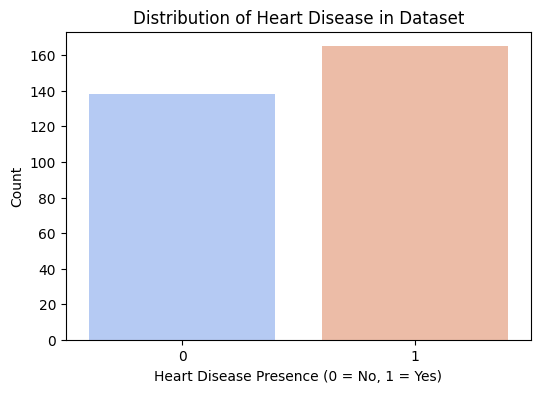

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="target", hue="target", palette="coolwarm", legend=False)
plt.xlabel("Heart Disease Presence (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Distribution of Heart Disease in Dataset")
plt.show()

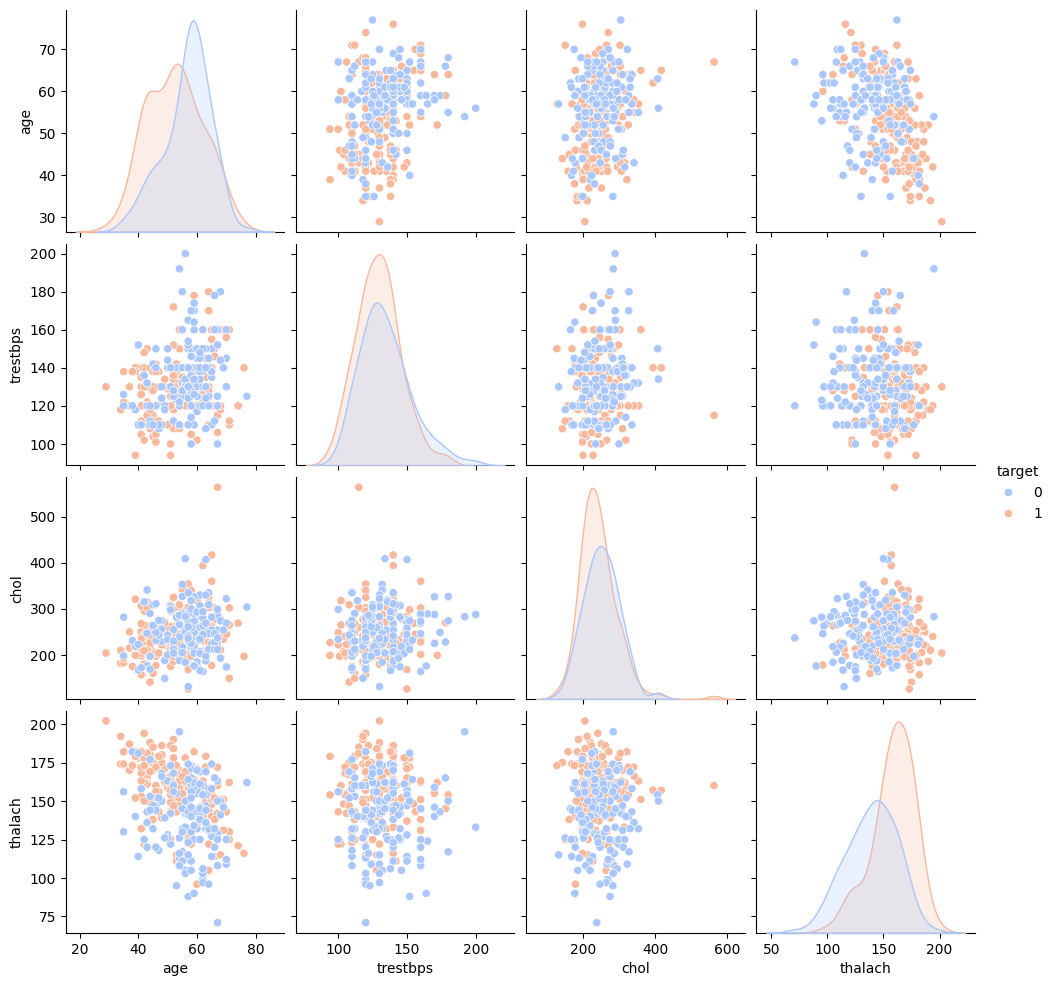

In [12]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target', palette="coolwarm", diag_kind="kde")
plt.show()

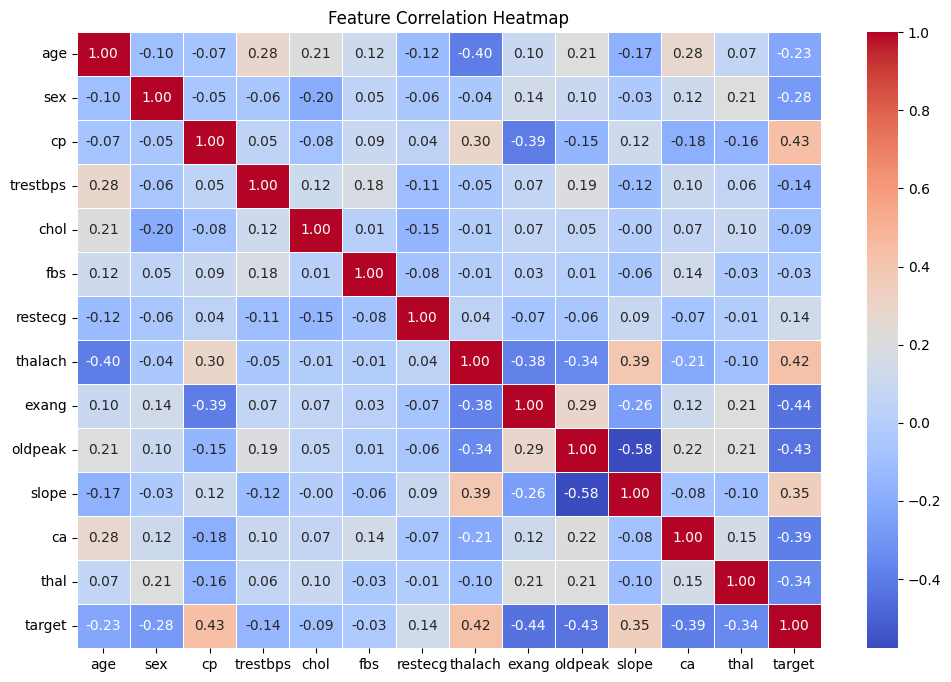

In [13]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True,cmap = "coolwarm",fmt = ".2f",linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
x = df.drop(columns=["target"])
y = df["target"]

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=101)

In [18]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [19]:
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test,y_pred)

In [21]:
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.84
